In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# Kernel polling timer
POLLING_TIMER = "10ms"

def diff_to_millijoules(diff):
    # Converts the energy differential to millijoules
    # Millijoules = diff * (1/2^16) * (10^3)
    return diff * (1 / 2**16) * (10**3)
    

# Data sources to run on. Default: calibrate, time, sleep, sysbench
data_sources = ['calibrate', 'time', 'sleep', 'sysbench', 'full']

# Read files. Their paths are in the format results/<datasource>/dmesg_<datasource>.csv
data = [(source, pd.read_csv(Path('results', POLLING_TIMER, source, f'dmesg_{source}.csv'))) for source in data_sources]

# Convert the energy differential to millijoules
for source in data:
    source[1]['diff'] = source[1]['diff'].apply(diff_to_millijoules)

# Scale time to start at 0
for source in data:
    source[1]['time'] = source[1]['time'] - source[1]['time'][0]


In [26]:
# Print the first and last time values for each data source
for source in data:
    print(f'{source[0]}: {source[1]["time"][0]} - {source[1]["time"][len(source[1]["time"]) - 1]}')

print('*' * 50)
# Print the cumulative times for each data source
# The previous end value is the start value for the next data source
start = 0
end = 0
for i, source in enumerate(data[:-1]):
    if i > 0:
        start += data[i - 1][1]['time'][len(data[i - 1][1]['time']) - 1]

    end += source[1]['time'][len(source[1]['time']) - 1]

    print(f'{data_sources[i]}: {start} - {end}')

calibrate: 0.0 - 362.9823179999985
time: 0.0 - 362.9281880000017
sleep: 0.0 - 300.90223799999876
sysbench: 0.0 - 303.98309999999765
full: 0.0 - 1332.9900239999988
**************************************************
calibrate: 0 - 362.9823179999985
time: 362.9823179999985 - 725.9105060000002
sleep: 725.9105060000002 - 1026.812743999999
sysbench: 1026.812743999999 - 1330.7958439999966


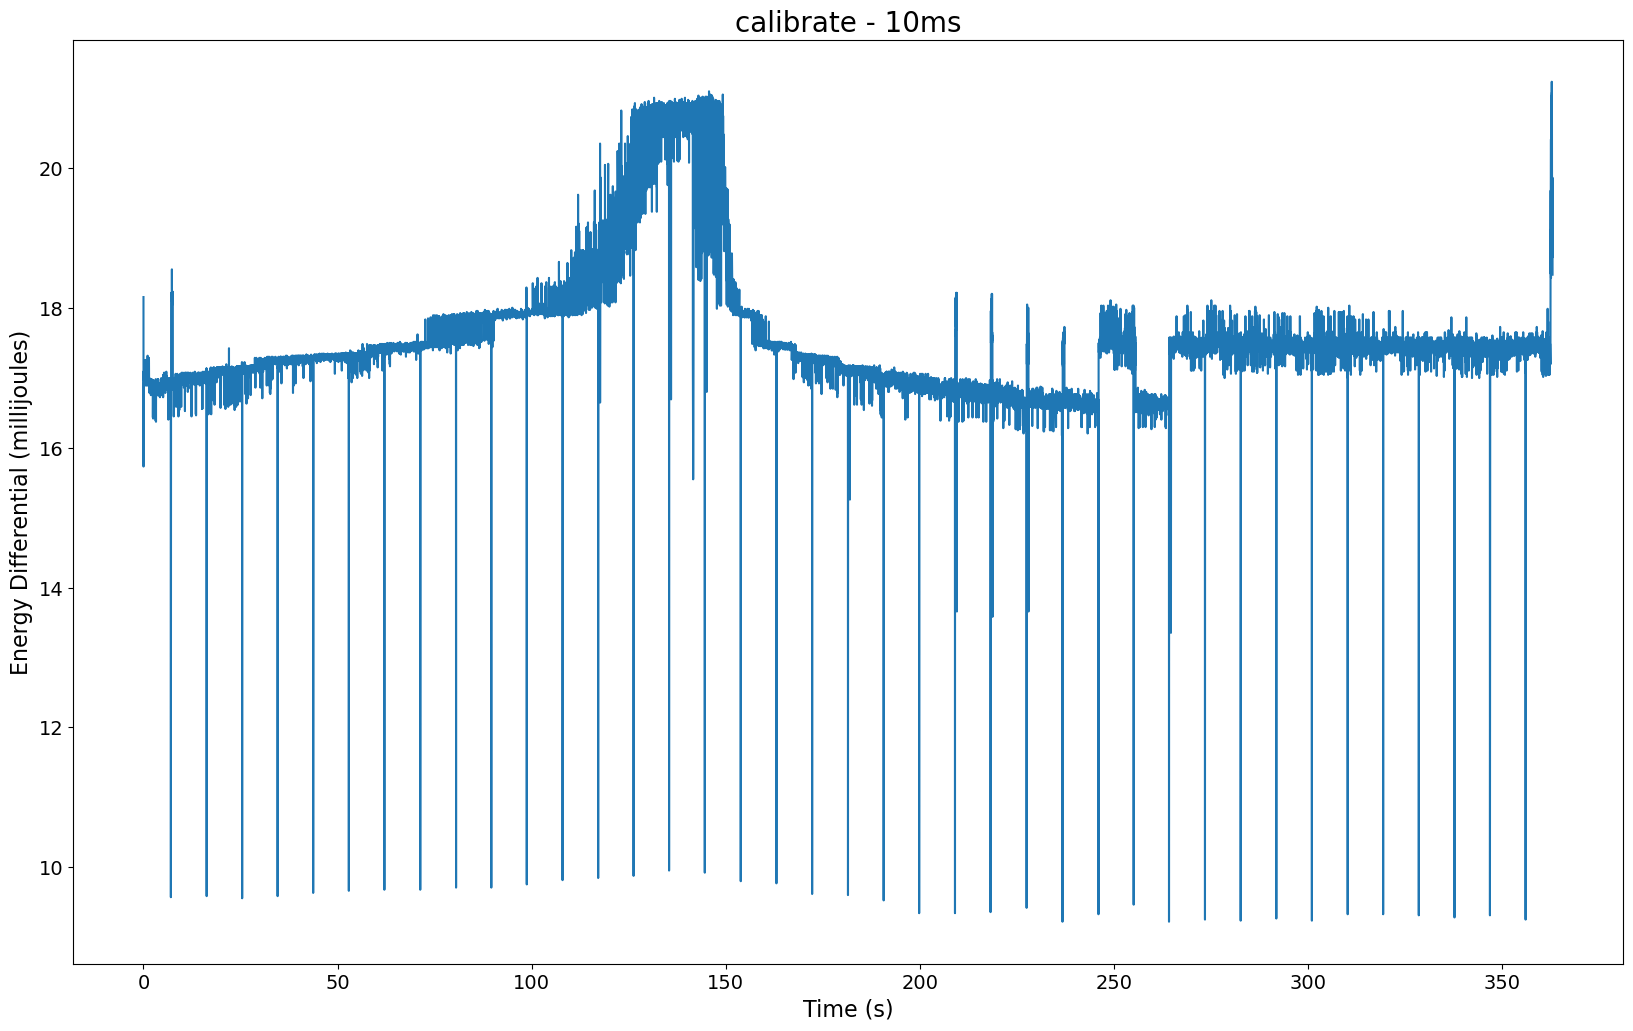

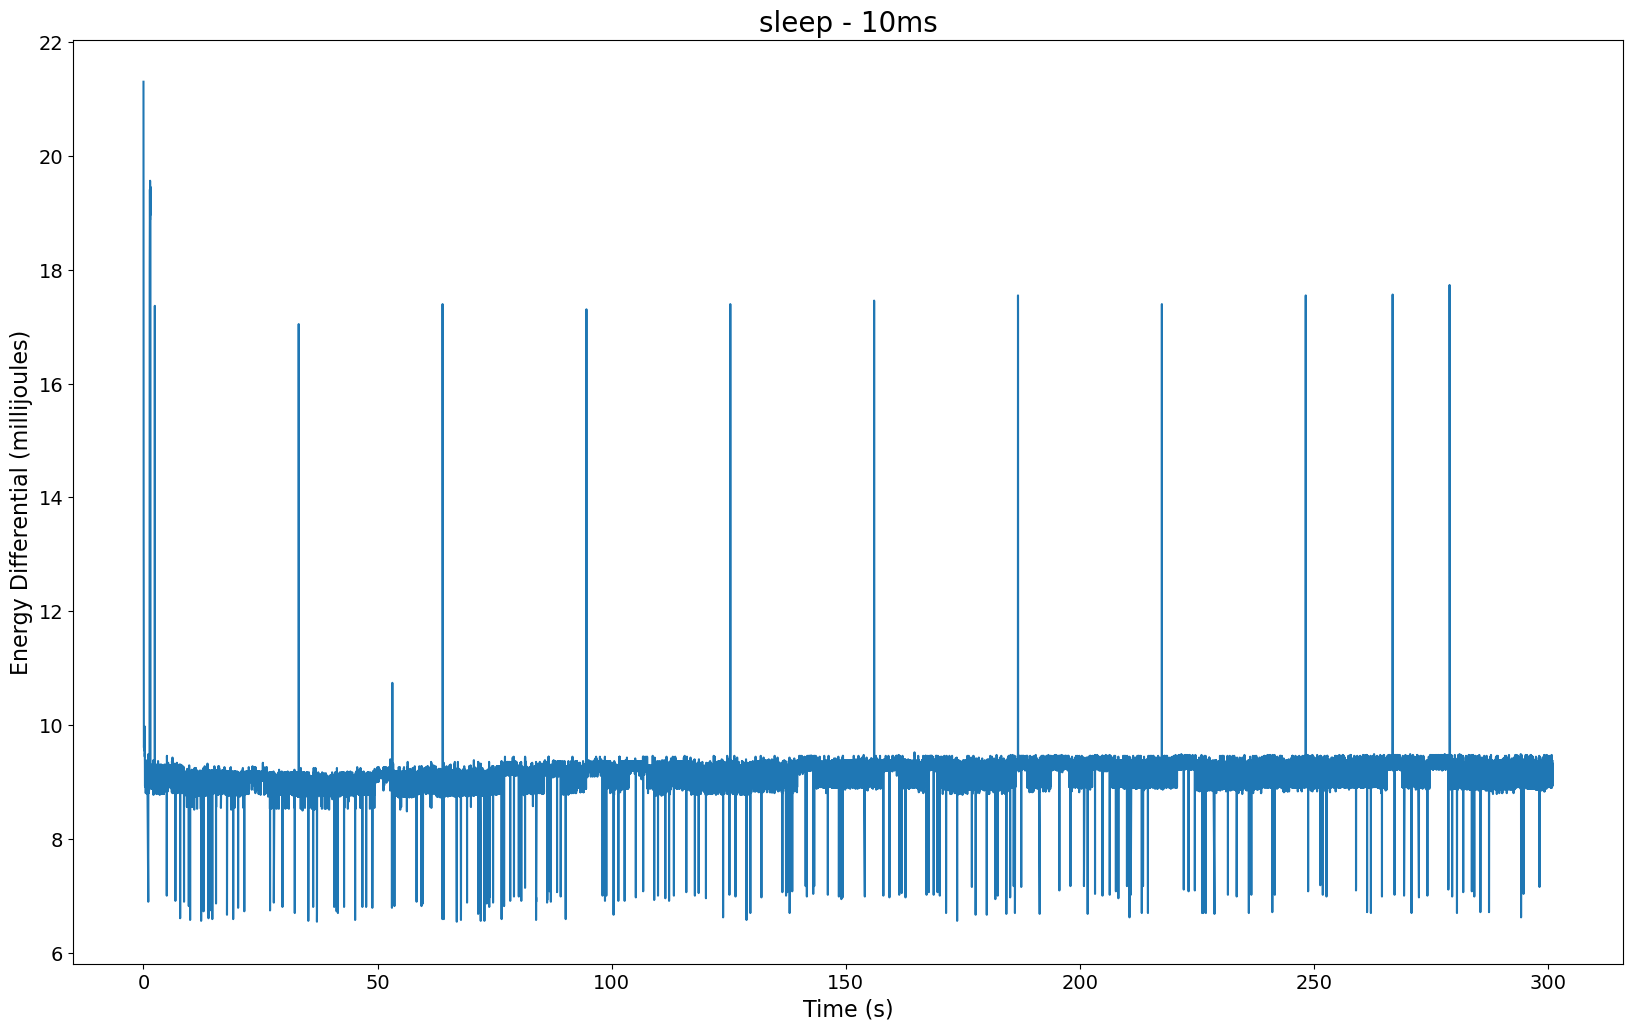

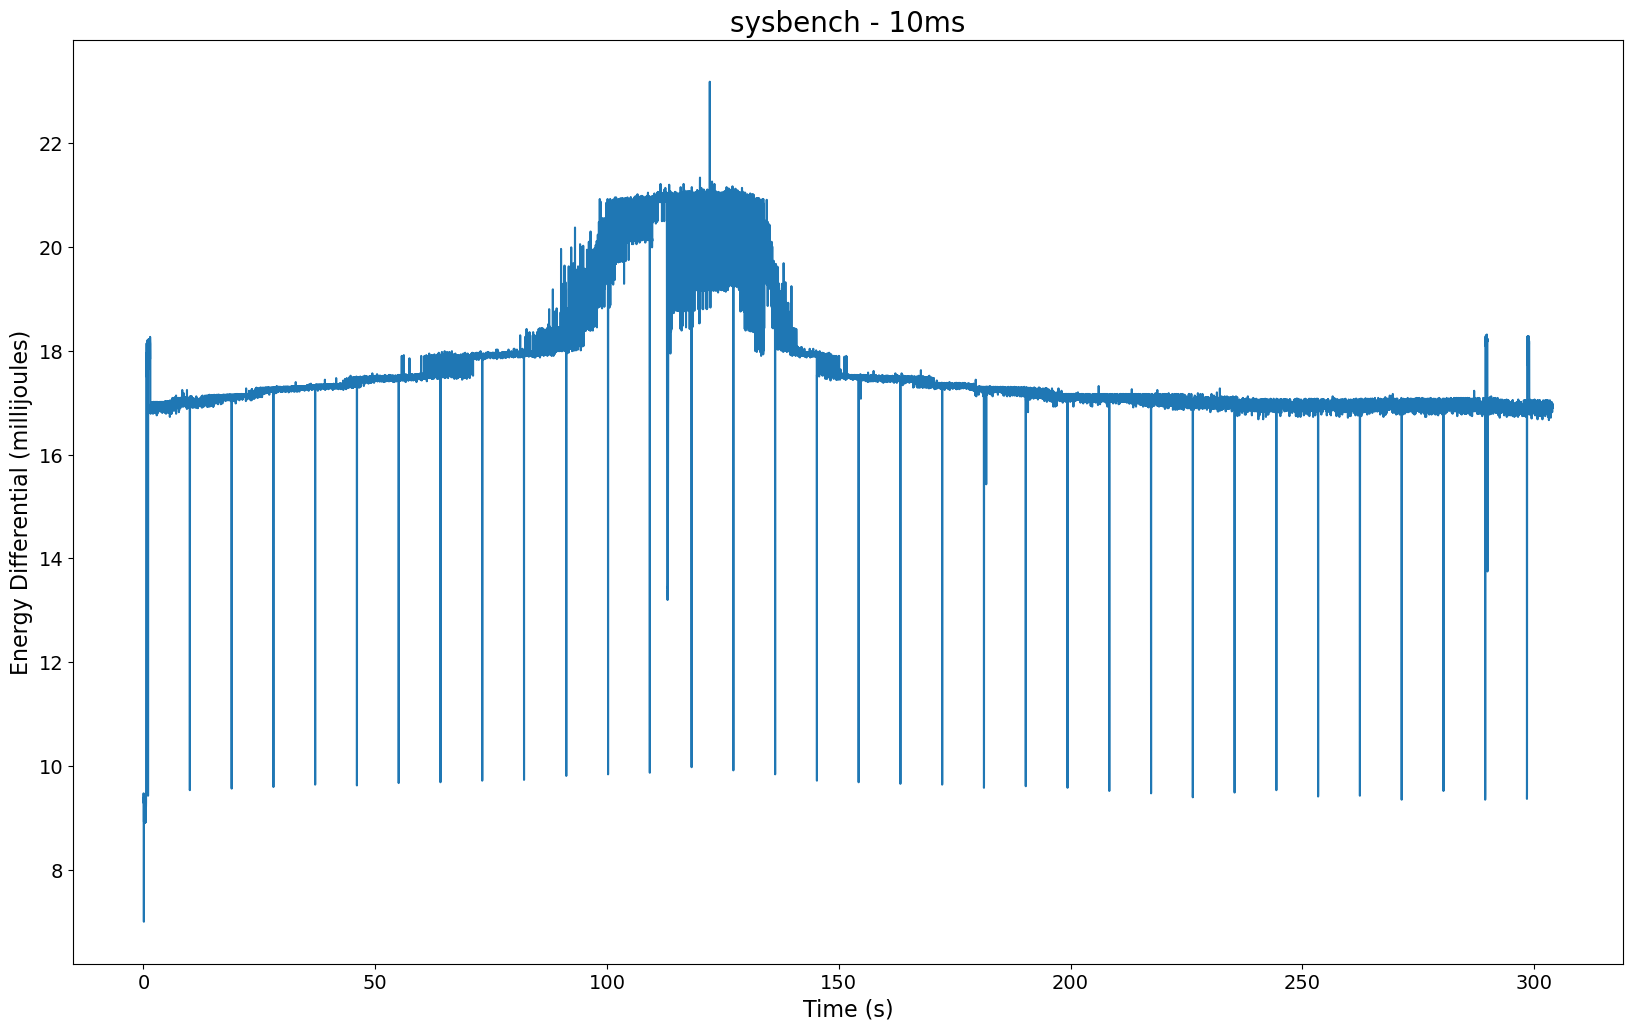

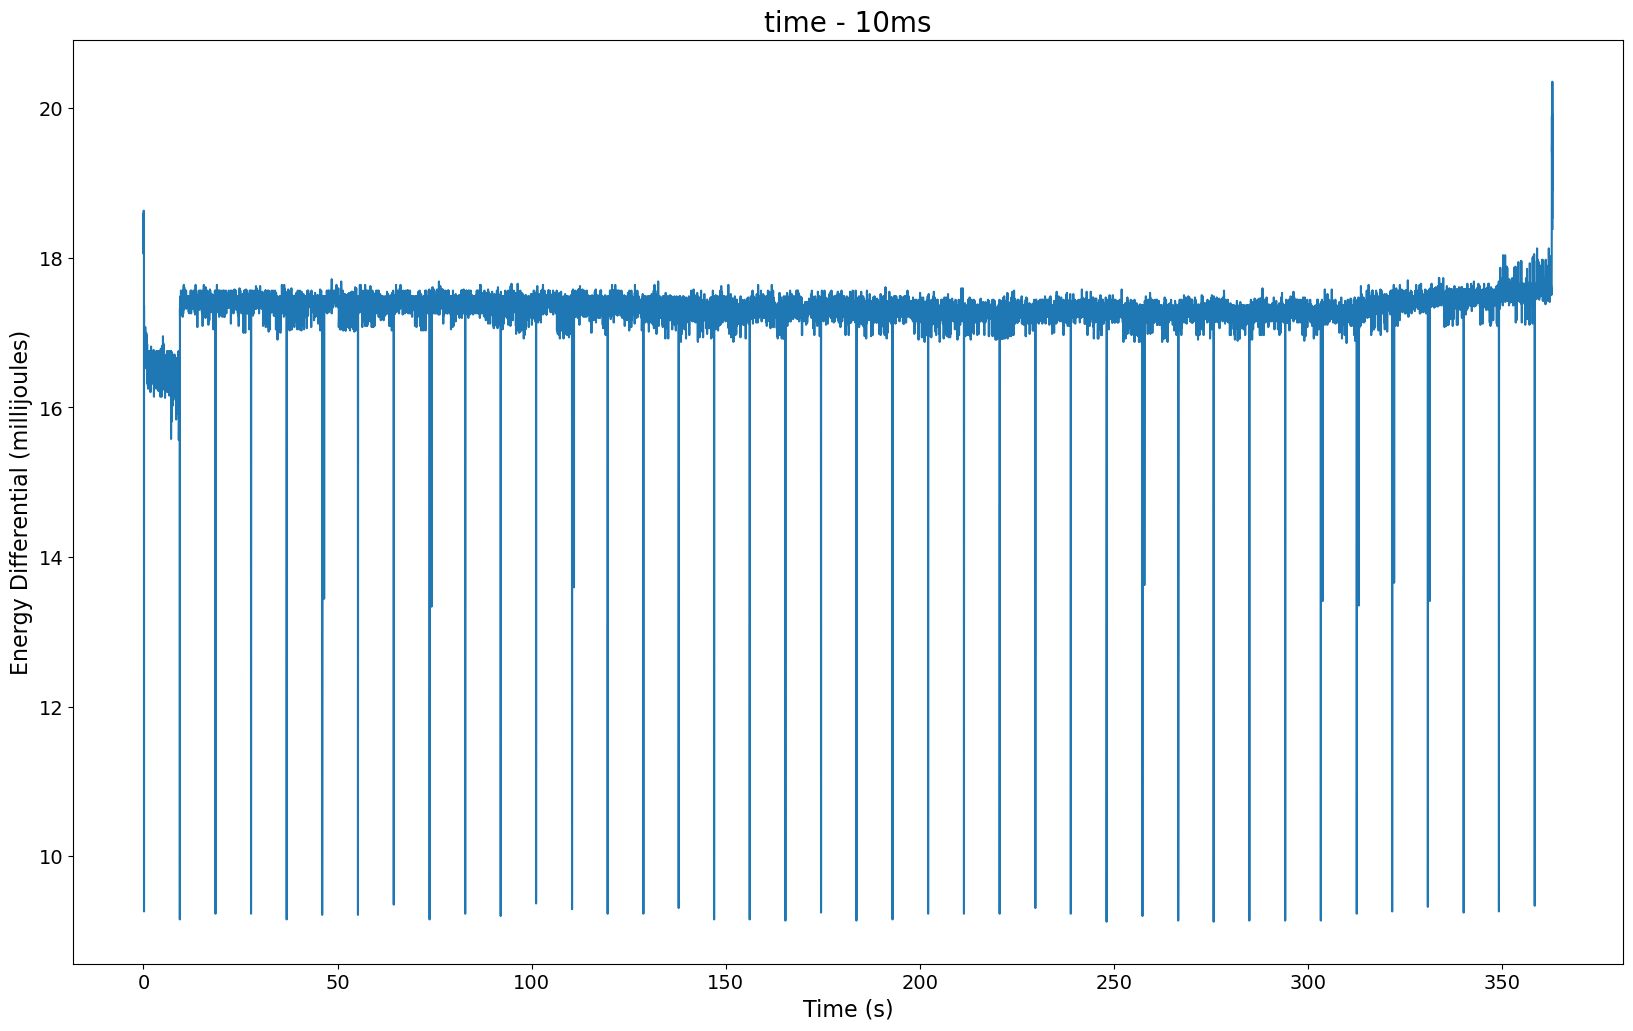

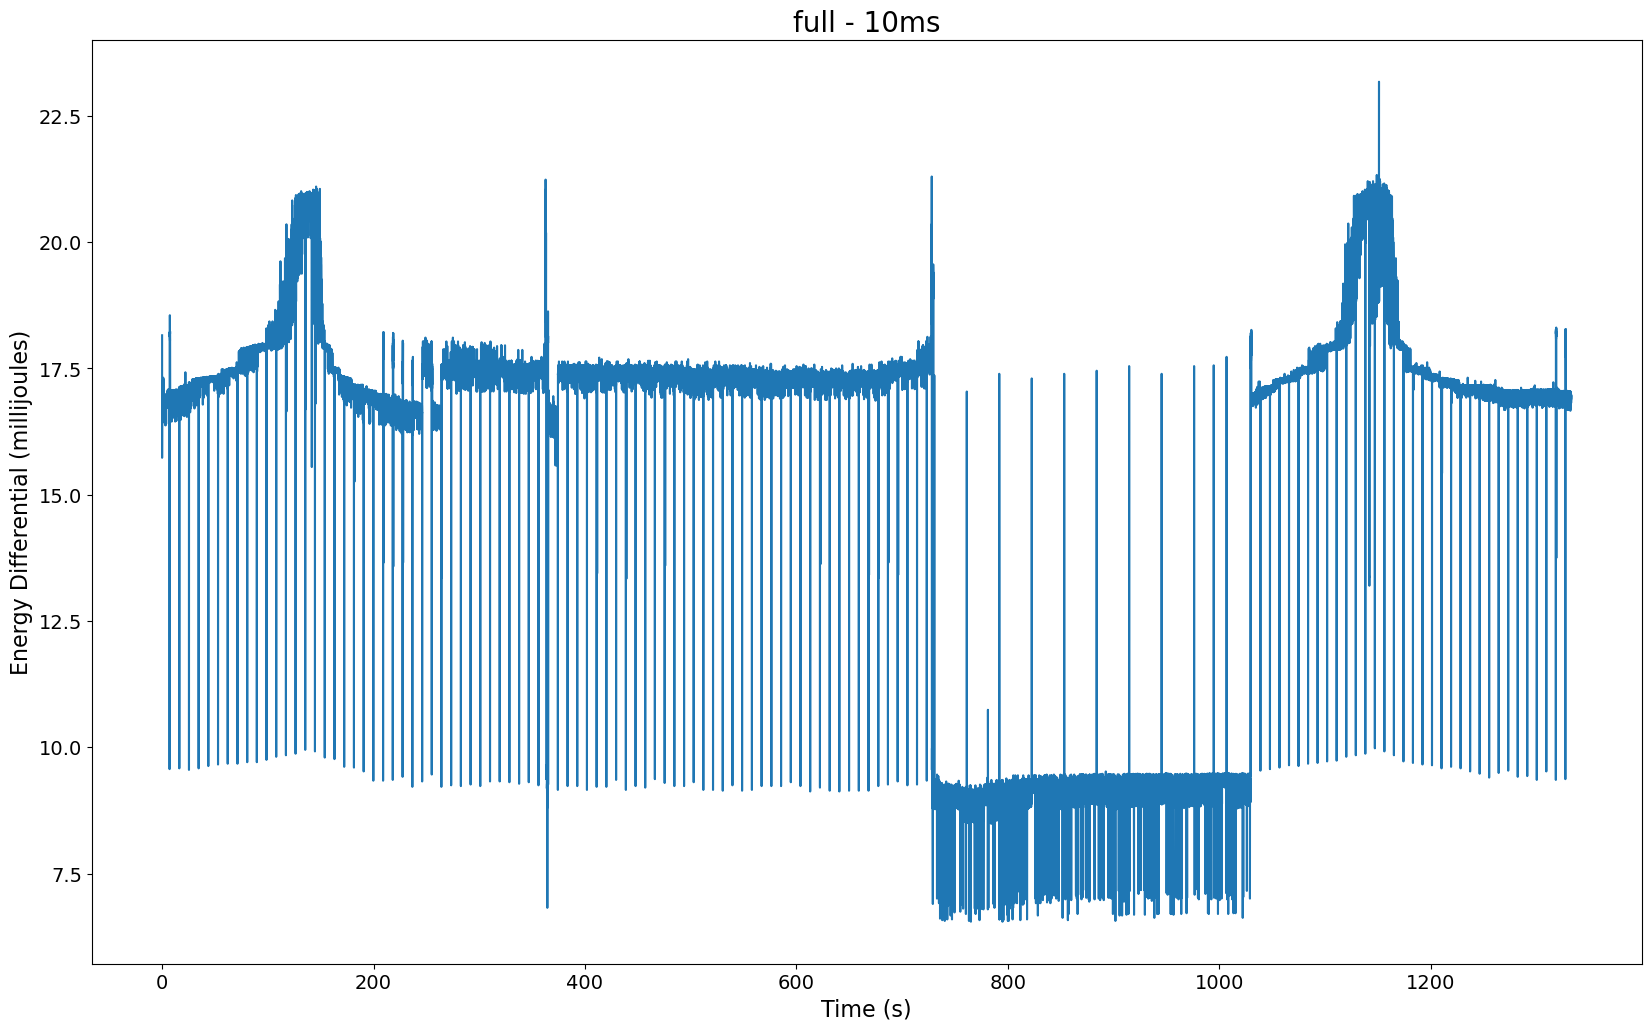

In [5]:
for source in data:
    # Plot the data
    source[1].plot(x='time', y='diff', title=f'{source[0]} - 10ms', figsize=(20, 12))
    plt.legend().set_visible(False)

    plt.xlabel('Time (s)', fontsize=16)
    plt.ylabel('Energy Differential (millijoules)', fontsize=16)

    # Bigger fonts for the title and axis labels
    plt.title(f'{source[0]} - 10ms', fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Save the plot to results/<datasource>/dmesg_plot.png
    #plt.savefig(Path('results', POLLING_TIMER, source[0], 'dmesg_plot.png'))

    plt.show()

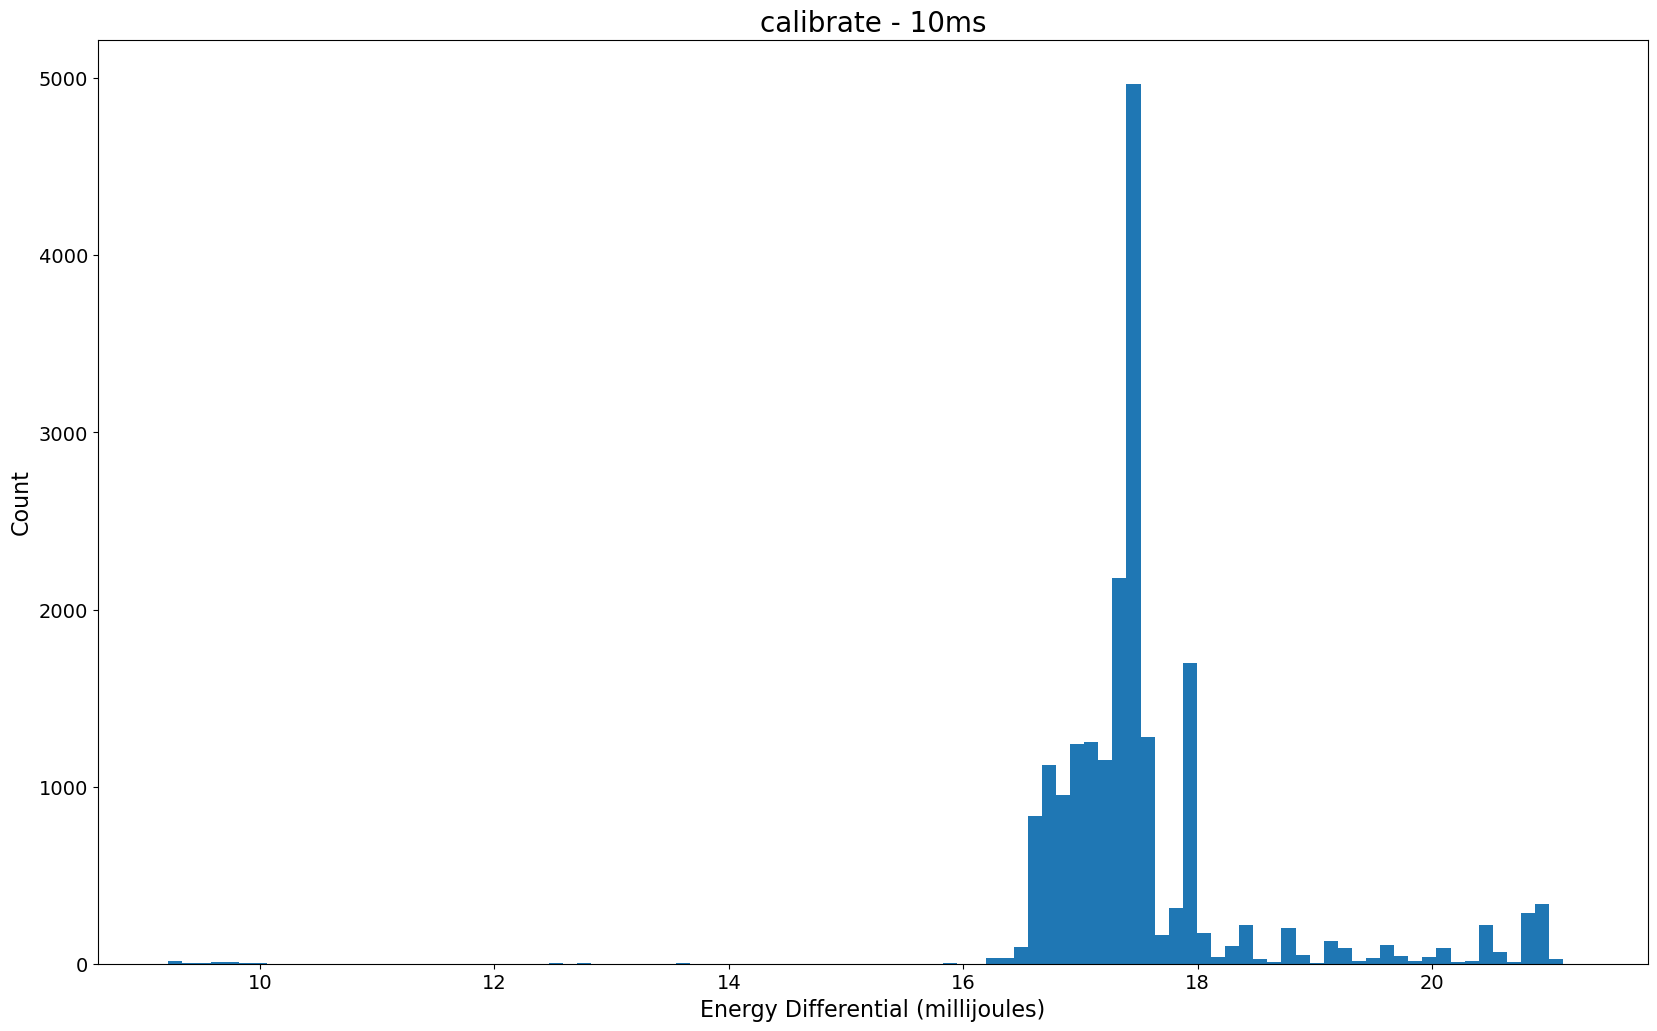

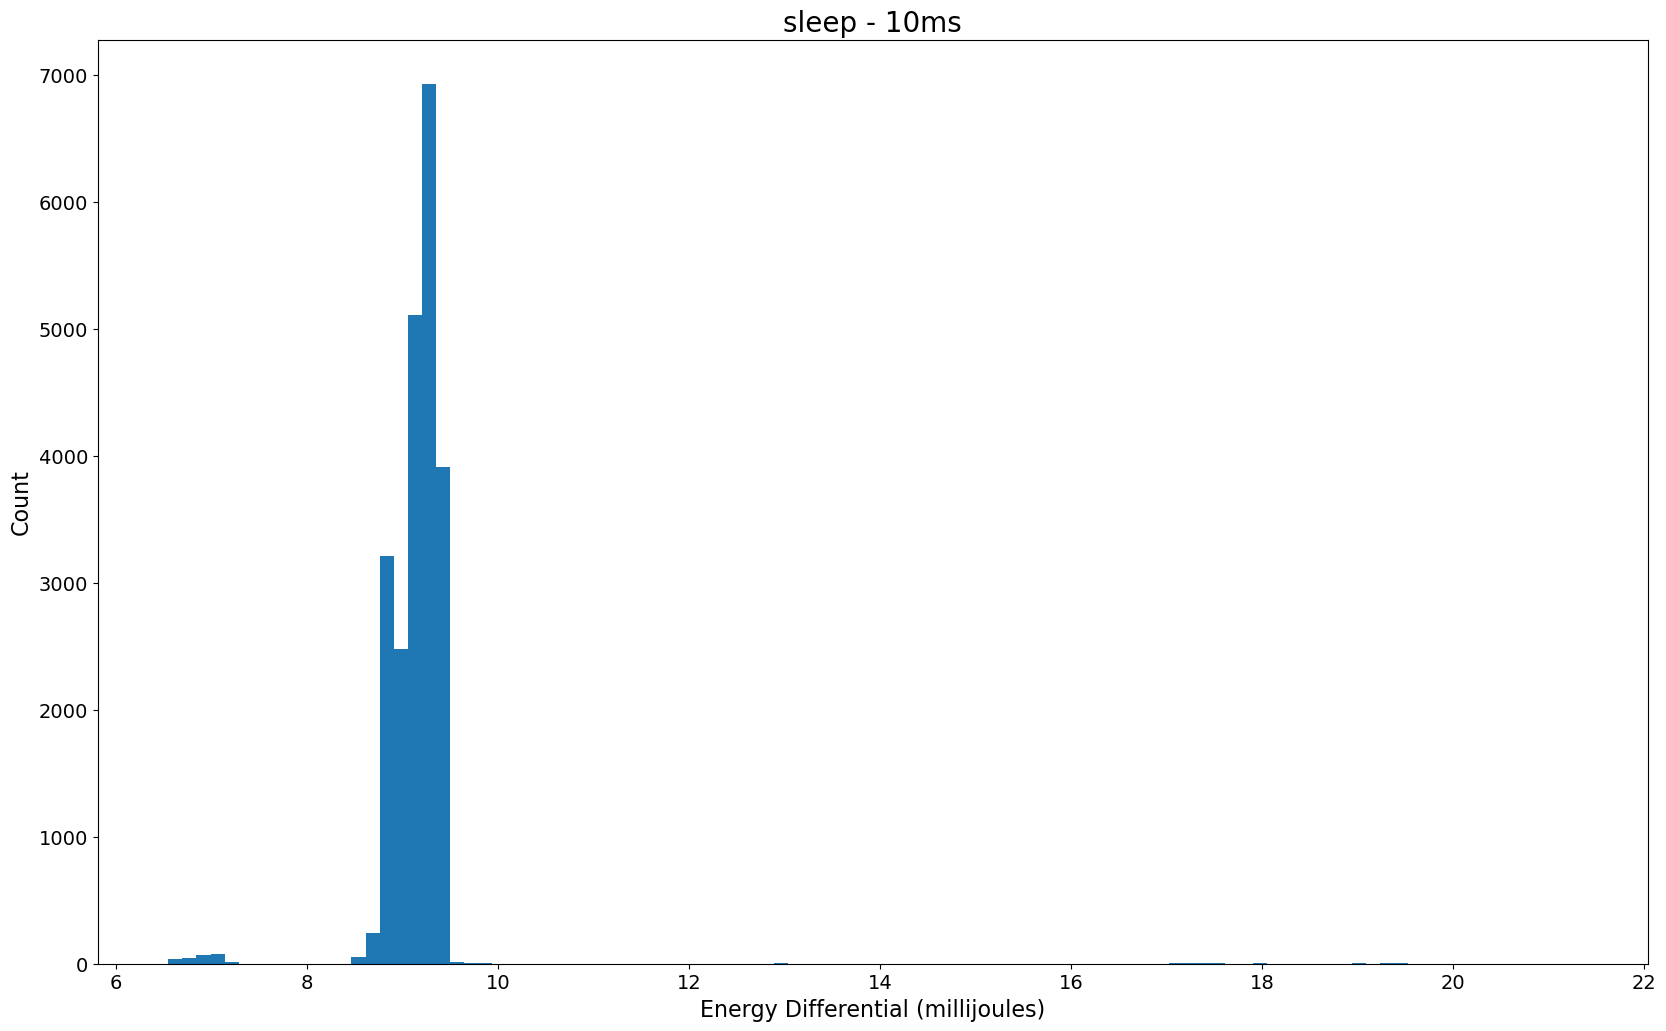

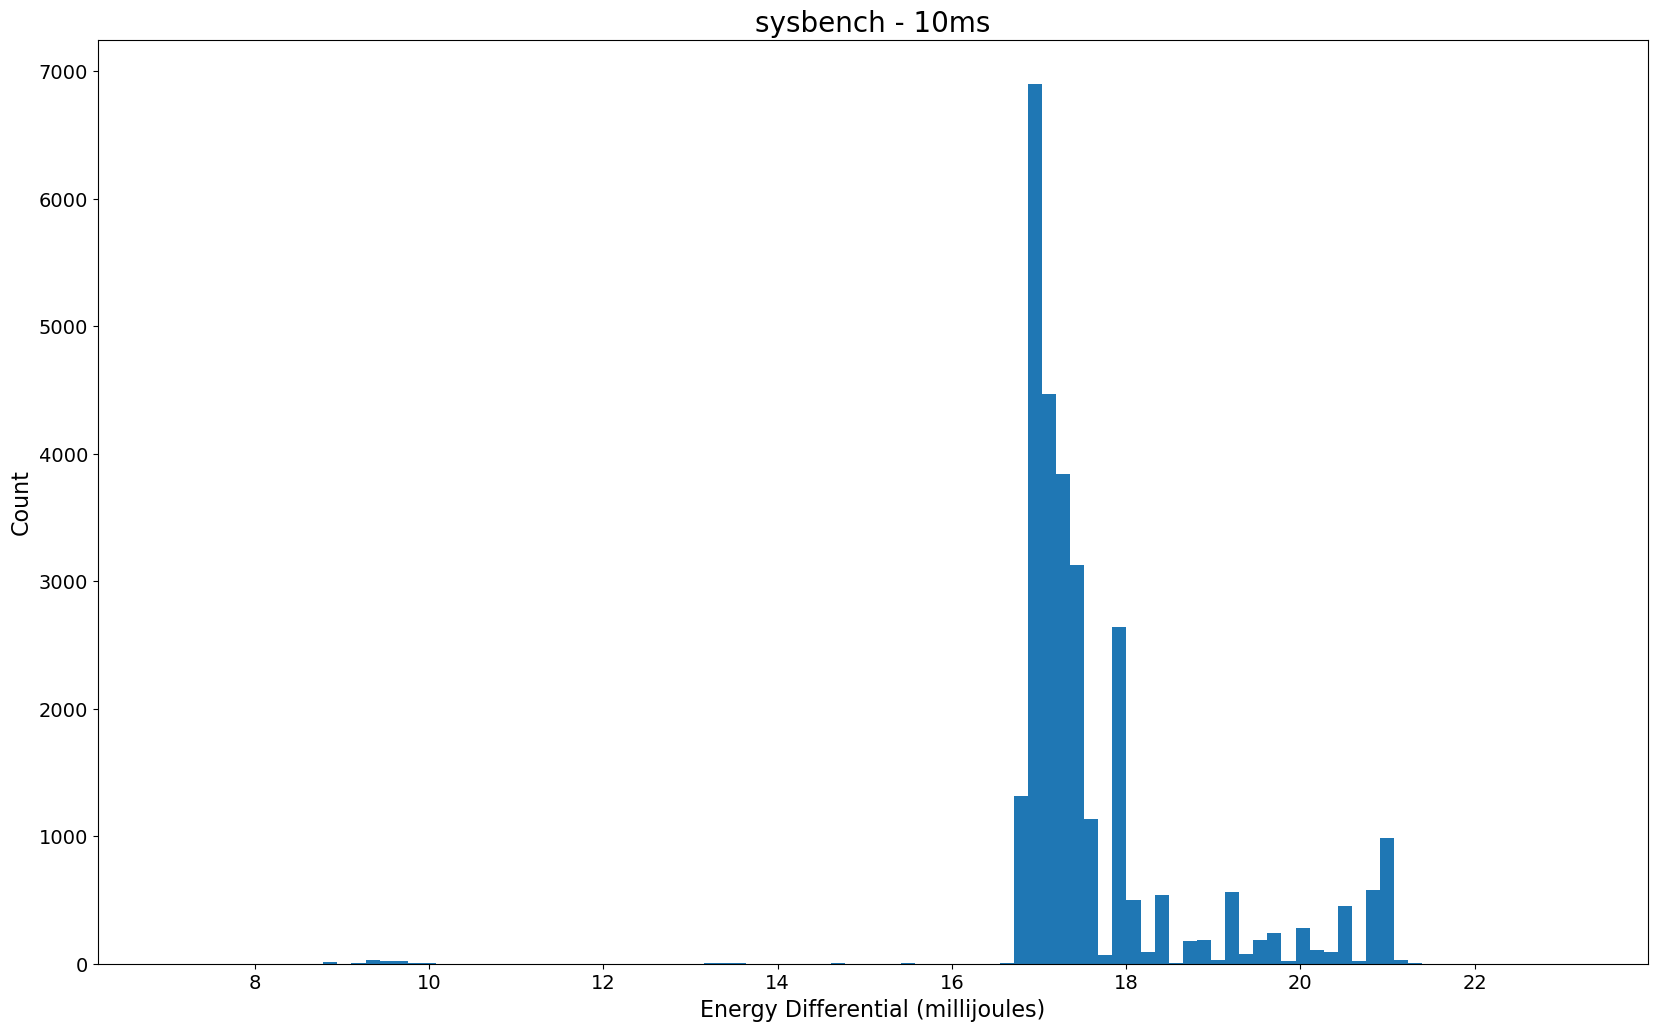

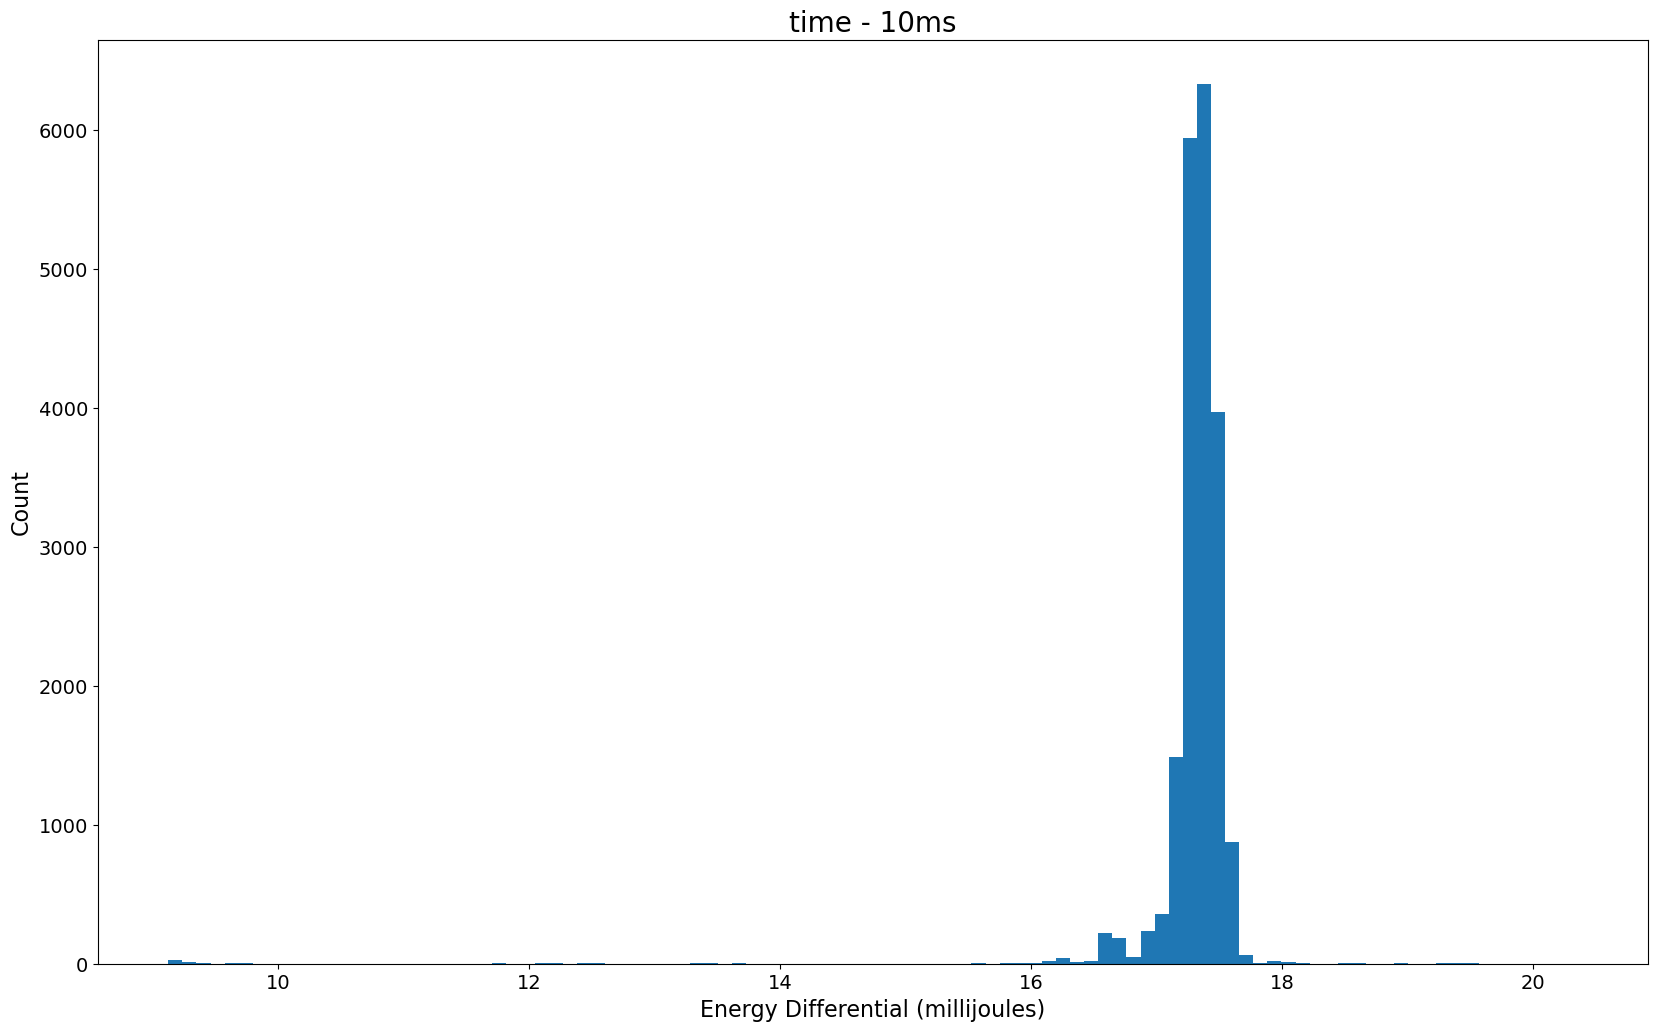

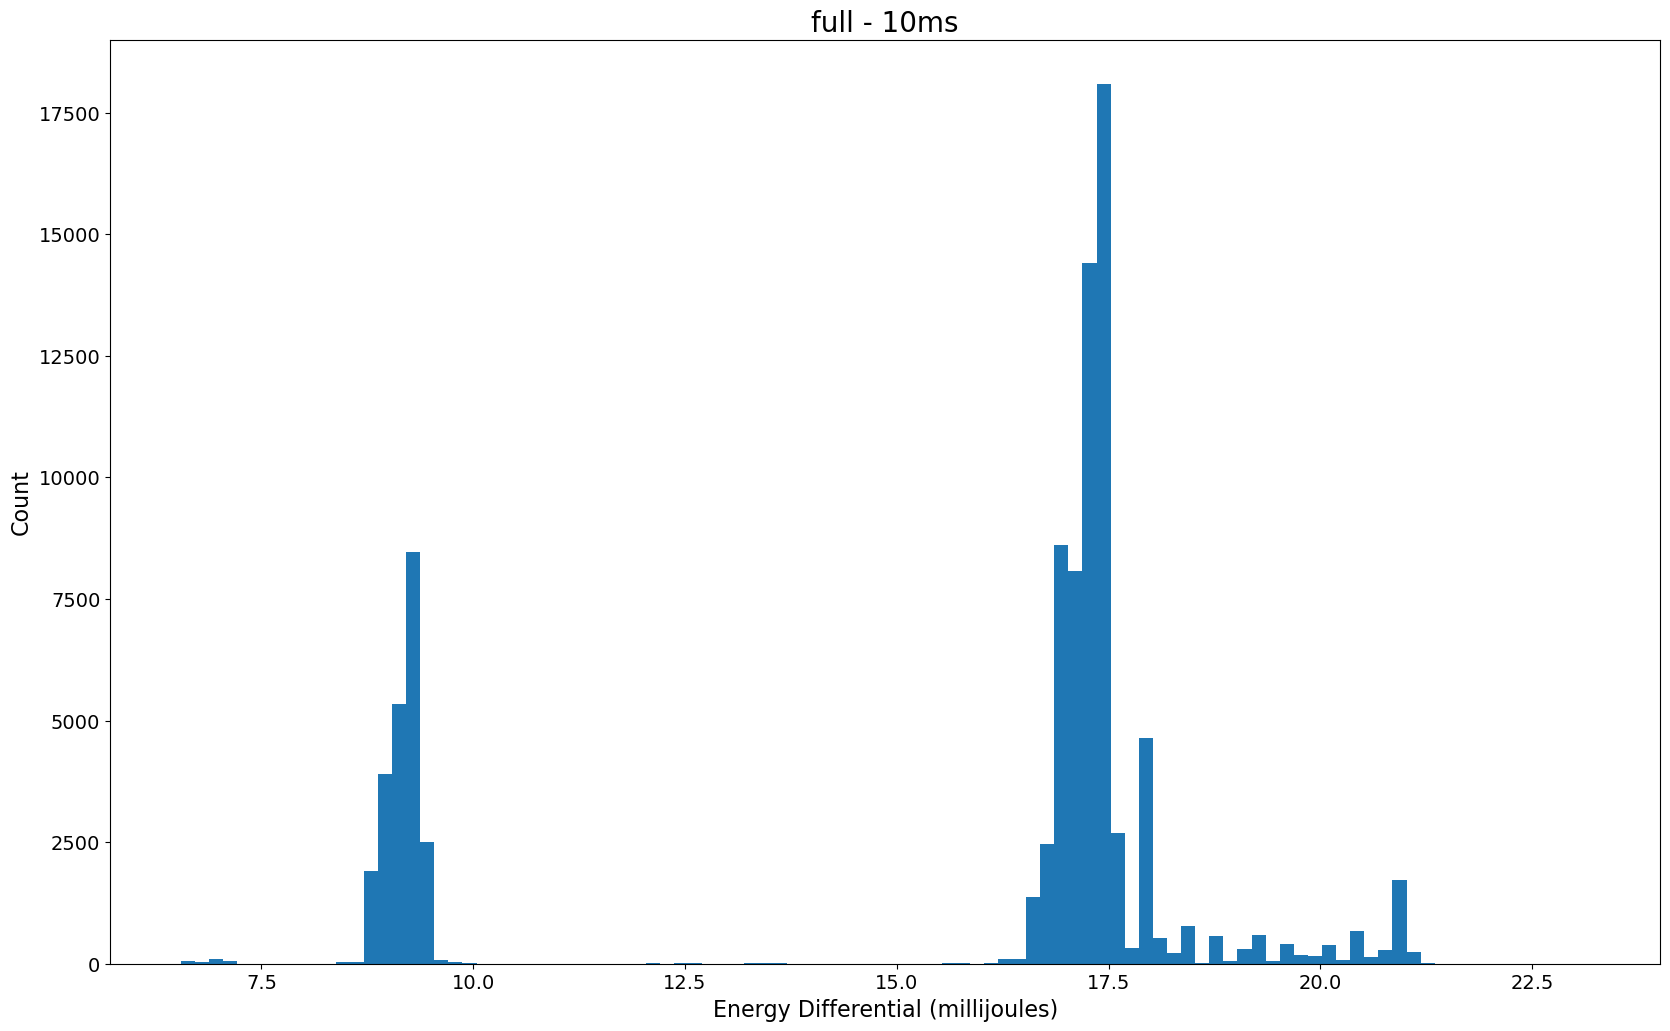

In [2]:
# Now do the same thing but with bin counts
for source in data:
    # Plot the data
    source[1].plot(x='time', y='diff', title=f'{source[0]} - 10ms', figsize=(20, 12), kind='hist', bins=100)
    plt.legend().set_visible(False)

    plt.xlabel('Energy Differential (millijoules)', fontsize=16)
    plt.ylabel('Count', fontsize=16)

    # Bigger fonts for the title and axis labels
    plt.title(f'{source[0]} - 10ms', fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Save the plot to results/<datasource>/dmesg_plot.png
    plt.savefig(Path('results', POLLING_TIMER, source[0], 'dmesg_plot_bins.png'))

    plt.show()